India- clearing 

In [ ]:
import pandas as pd

#read a csv file 
df = pd.read_csv("Karnataka_india.csv")

#delete the following columns: 'Amb_Temp'
df = df.drop(columns=['Amb_Temp'])

#delete the nan values from the dataframe
df = df.dropna()

#save corrected file
df.to_csv("Karnataka_india_cleared.csv", index=False)

#info
print(df.info())
print(df.head())
print(df.describe())
print(df.columns)

Index(['MODULE_TEMP', 'WIND_Speed', 'IRR (W/m2)', 'DC Current in Amps',
       'AC Ir in Amps', 'AC Iy in Amps', 'AC Ib in Amps', 'AC Power in Watts'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118865 entries, 0 to 118864
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MODULE_TEMP         118865 non-null  float64
 1   WIND_Speed          118865 non-null  float64
 2   IRR (W/m2)          118865 non-null  float64
 3   DC Current in Amps  118865 non-null  float64
 4   AC Ir in Amps       118865 non-null  float64
 5   AC Iy in Amps       118865 non-null  float64
 6   AC Ib in Amps       118865 non-null  float64
 7   AC Power in Watts   118865 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 7.3 MB
None
   MODULE_TEMP  WIND_Speed  IRR (W/m2)  DC Current in Amps  AC Ir in Amps  \
0      18.7675    47.60506    6.388252                0.60            8.6   
1      

Analyze for India

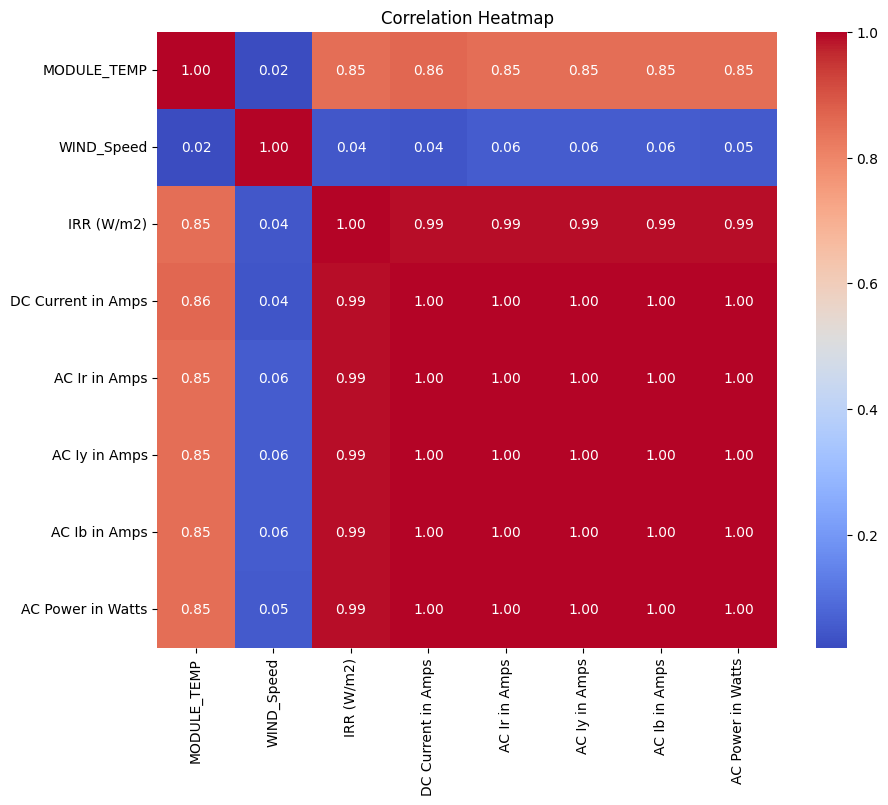

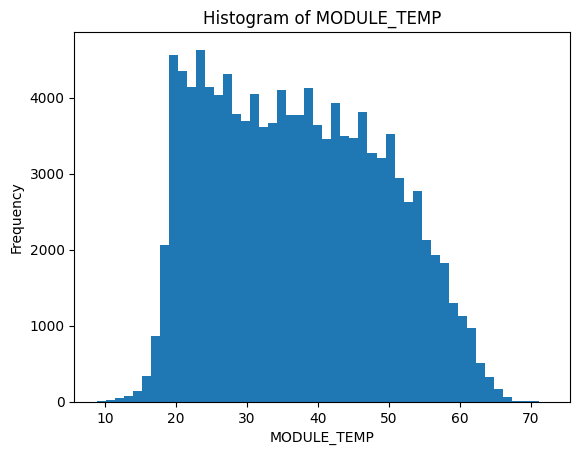

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#read csv file
df = pd.read_csv("Karnataka_india_cleared.csv")

#graph AC Power in Watts over is IRR (W/m2)
print(df.columns)
plt.scatter(df['IRR (W/m2)'], df['AC Power in Watts'])
plt.xlabel('Solar irradiance (W/m2)') 
plt.ylabel('AC power in watts')
plt.title('AC power vs solar irradiance')
plt.show()

#histogram of AC Power in Watts 
plt.hist(df['AC Power in Watts'], bins=50)
plt.xlabel('AC power in watts')
plt.ylabel('Frequency')
plt.title('Histogram of AC power')
sns.boxplot(x=df['AC power in watts'], color='red', width=0.5)
plt.show()

#histogram of IRR (W/m2)
plt.hist(df['IRR (W/m2)'], bins=50, alpha=0.5, color='blue')
sns.kdeplot(df['IRR (W/m2)'], color='red')
plt.xlabel('Solar irradiance (W/m2)')
plt.ylabel('Frequency')
plt.title('Histogram of solar irradiance')
plt.show()

#division of the data into 2 file
df_high_irr = df[df[' Solar irradiance (W/m2) '] > 150]
df_low_irr = df[df[' Solar irradiance (W/m2) '] <= 150]
df_high_irr.to_csv("Karnataka_india_high_irr.csv", index=False)
df_low_irr.to_csv("Karnataka_india_low_irr.csv", index=False)

#graph MODULE_TEMP over WIND_Speed
plt.scatter(df['MODULE_TEMP'], df[' WIND_Speed '])
plt.xlabel('Module temperature ')
plt.ylabel(' Wind speed ')
plt.title('Wind speed vs Module temperature')
plt.show()

#Only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

#correlation heatmap and Spearman correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#histogram of MODULE_TEMP
plt.hist(df['MODULE_TEMP'], bins=50)
plt.xlabel('Module temperature ')
plt.ylabel('Frequency')
plt.title('Histogram of modeule temperature')
plt.show()

India- analysis for low irriadance

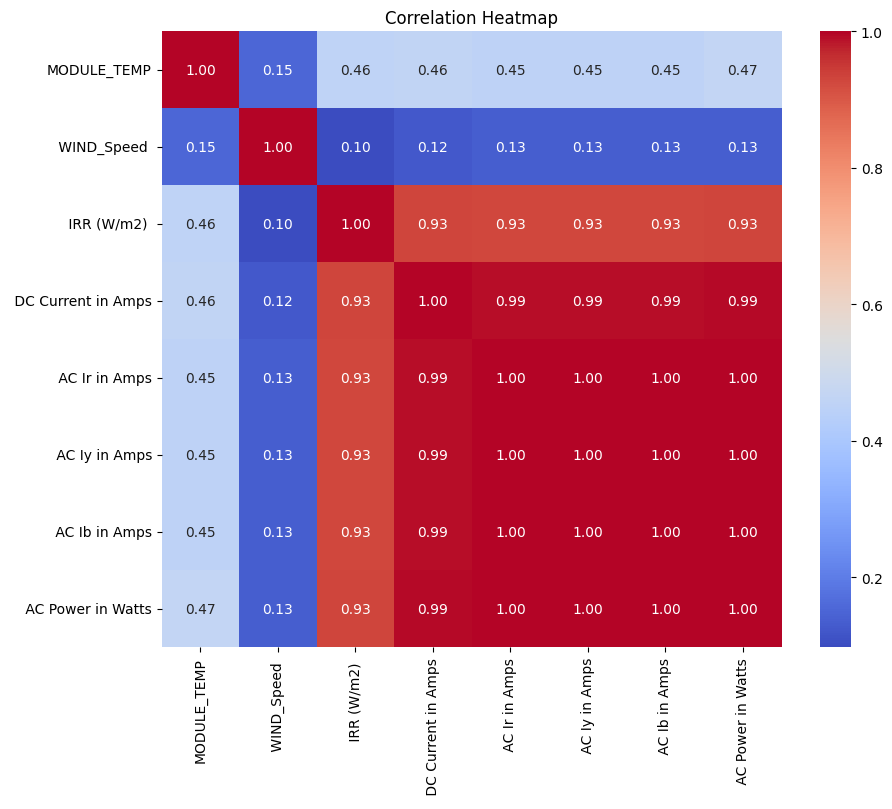

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#read csv file 
df = pd.read_csv("Karnataka_india_low_irr.csv")

#Histogram of AC Power in Watts, Module_Temp and IRR (W/m2)
plt.hist(df[' AC Power in Watts'], bins=50)
plt.xlabel(' AC power in watts ')
plt.ylabel('Frequency')
plt.title('Histogram of AC power (Low IRR)')
plt.show()

#Histogram of IRR (W/m2)
plt.hist(df[' IRR (W/m2) '], bins=50)
plt.xlabel(' Solar irradiance (W/m2) ')
plt.ylabel('Frequency')
plt.title('Histogram of solar irradiance (Low IRR)')
plt.show()

#Histogram of MODULE_TEMP
plt.hist(df['MODULE_TEMP'], bins=50)
plt.xlabel('Module temperature')
plt.ylabel('Frequency')
plt.title('Histogram of module temperature (Low IRR)')
plt.show()

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

#Correlation heatmap and Spearman correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

India analysis for high irradiance

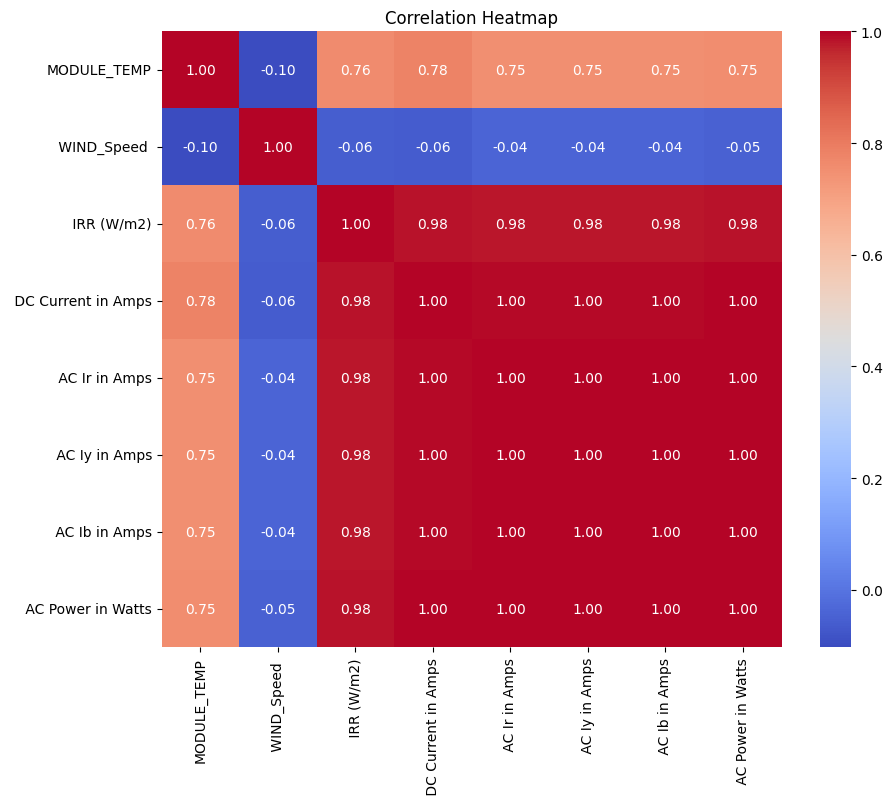

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#read csv file 
df = pd.read_csv("Karnataka_india_high_irr.csv")

#Histogram of AC Power in Watts, Module_Temp and IRR (W/m2)
plt.hist(df[' AC Power in Watts'], bins=50)
plt.xlabel(' AC power in watts ')
plt.ylabel('Frequency')
plt.title('Histogram of AC power (High IRR )')
plt.show()

#Histogram of IRR (W/m2)
plt.hist(df[' IRR (W/m2) '], bins=50)
plt.xlabel(' Solar irradiance (W/m2) ')
plt.ylabel('Frequency')
plt.title('Histogram of solar irradiance (High IRR)')
plt.show()

#Histogram of MODULE_TEMP
plt.hist(df['MODULE_TEMP'], bins=50)
plt.xlabel('Module temperature')
plt.ylabel('Frequency')
plt.title('Histogram of module temperature (High IRR)')
plt.show()

#Pairplot of AC Power in Watts, Module_Temp and IRR (W/m2)
import seaborn as sns
sns.pairplot(df[[' AC Power in Watts', 'MODULE_TEMP', ' IRR (W/m2)']])
plt.suptitle('Pairplot of AC power, module temperature, and solar irradiance (High IRR)', y=1.02)
plt.show()

#Only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Correlation heatmap and Spearman correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

#read csv file "Karnataka_india_high_irr.csv"
import pandas as pd
df = pd.read_csv("Karnataka_india_high_irr.csv")    

#graph xaxis is  AC Power in Watts and yaxis is IRR (W/m2), add a regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x=' IRR (W/m2)', y=' AC Power in Watts', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Solar irradiance (W/m²)')
plt.ylabel('AC power (W)')
plt.title('AC power vs irradiance (2D histogram)')
plt.show()



Cleaning Denmark

In [ ]:
import pandas as pd

#read csv file "Denmark_Kalundbor.csv" 
# read with semicolon separator and comma decimal (European format)
df = pd.read_csv("Denmark_Kalundbor.csv", sep=';', decimal=',', engine='python', encoding='utf-8')
# normalize column names
df.columns = df.columns.str.strip()

# rename columns 
df = df.rename(columns={
    'PCTimeStamp': 'Date and time',
    'WTG01_Ambient WindSpeed Avg. (1)': 'Wind_speed',
    'WTG01_Blades PitchAngle Avg. (2)': 'Blade_pitch_angle',
    'WTG01_Grid Production Power Avg. (3)': 'Power_output'
})

# parse datetime (day-first) and coerce malformed values to NaT
if 'Date and time' in df.columns:
    df['Date and time'] = pd.to_datetime(df['Date and time'].astype(str).str.strip(), dayfirst=True, errors='coerce')

# coerce numeric columns to floats 
for col in ['Wind_speed', 'Power_output']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.strip().str.replace(',', '.', regex=False), errors='coerce')

# drop Blade_pitch_angle column if present
df = df.drop(columns=['Blade_pitch_angle'], errors='ignore')
print(df.columns)

# drop rows missing essential data (datetime, wind or power)
df = df.dropna(subset=[c for c in ['Date and time', 'Wind_speed', 'Power_output'] if c in df.columns], how='any')
print(df.info())
print(df.describe())

# save the cleaned file
df.to_csv("Denmark_Kalundborg_cleared.csv", sep=';', index=False)


Index(['Date and time', 'Wind_speed', 'Power_output'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1726 entries, 0 to 250560
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and time  1726 non-null   datetime64[ns]
 1   Wind_speed     1726 non-null   float64       
 2   Power_output   1726 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 53.9 KB
None
                       Date and time   Wind_speed  Power_output
count                           1726  1726.000000   1726.000000
mean   2022-04-15 03:37:45.121668608     6.176999    628.557358
min              2019-12-01 00:00:00     0.100000    -24.400000
25%              2021-02-05 06:00:00     4.400000    135.775000
50%              2022-04-12 12:00:00     5.800000    418.650000
75%              2023-06-21 18:00:00     7.600000    983.125000
max              2024-09-05 00:00:00    20.900000   2003.7

Denmark analysis

Index(['Date and time', 'Wind_speed', 'Power_output'], dtype='object')


Index(['Date and time', 'Wind_speed', 'Power_output'], dtype='object')


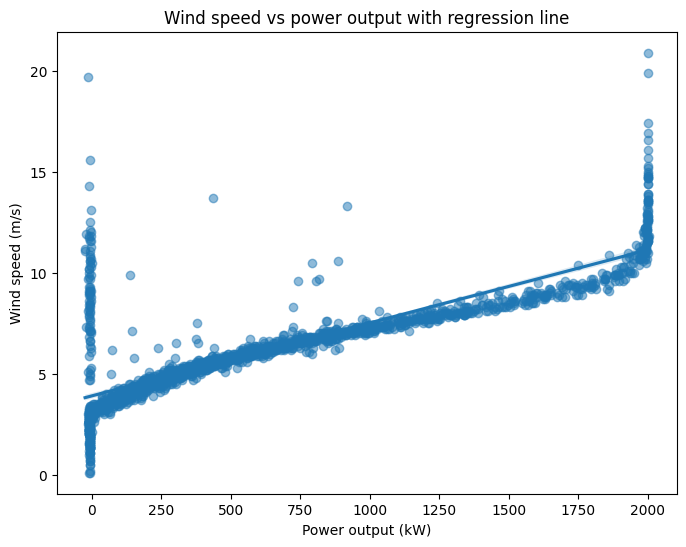

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#read csv file "Denmark_Kalundborg_cleared.csv"
df = pd.read_csv("Denmark_Kalundborg_cleared.csv", sep=';', decimal=',', engine='python', encoding='utf-8')
print(df.columns)

#print histogram of Wind_speed
plt.hist(df['Wind_speed'], bins=50)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of wind speed')
plt.show()

#scatter plot of Wind_speed vs Power_output
plt.scatter(df['Wind_speed'], df['Power_output'], alpha=0.5)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Power output (kW)')
plt.title('Power output vs Wind speed')
plt.show()

#histogram of Power_output
plt.hist(df['Power_output'], bins=50)
plt.xlabel('Power output (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of power output')
plt.show()

#correlation heatmap between Wind_speed and Power_output
correlation_matrix = df[['Wind_speed', 'Power_output']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap between wind speed and power output')
plt.show()

#print a graph xaxis is Power_output and yaxis is wind_speed
plt.figure(figsize=(8,6))
sns.regplot(x='Power_output', y='Wind_speed', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Power output (kW)')
plt.ylabel('Wind speed (m/s)')
plt.title('Wind speed vs power output with regression line')
plt.show()

Clean Turkey

In [ ]:
import pandas as pd

#read a csv file "Yalova Tureky.csv"
df = pd.read_csv("Yalova Tureky.csv")

#delete column: 'Wind Direction (°)
df = df.drop(columns=['Wind Direction (°)'], errors='ignore')

#change the columns names: 'Date & Time' to 'Date_and_time', Wind Speed (m/s)' to 'Wind_speed', Theoretical_Power_Curve (KWh)' to 'Theoretical_Power'
df = df.rename(columns={
    'Date & Time': 'Date_and_time',
    'Wind Speed (m/s)': 'Wind_speed',
    'LV ActivePower (kW)': 'Active_Power',
    'Theoretical_Power_Curve (KWh)': 'Theoretical_Power'
})  
print(df.columns)

#delete nan values from the dataframe
df = df.dropna()
print(df.info())
print(df.describe())
print(df.head())

#save the file as "Yalova_Turkey_cleared.csv"
df.to_csv("Yalova_Turkey_cleared.csv", index=False)


Index(['Date/Time', 'Active_Power', 'Wind_speed', 'Theoretical_Power'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          50530 non-null  object 
 1   Active_Power       50530 non-null  float64
 2   Wind_speed         50530 non-null  float64
 3   Theoretical_Power  50530 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB
None
       Active_Power    Wind_speed  Theoretical_Power
count  50530.000000  50530.000000       50530.000000
mean    1307.684332      7.557952        1492.175463
std     1312.459242      4.227166        1368.018238
min       -2.471405      0.000000           0.000000
25%       50.677890      4.201395         161.328167
50%      825.838074      7.104594        1063.776283
75%     2482.507568     10.300020        2964.972462
max     3618.732910     25.206011  

Analysis for the Turkey

Columns: ['Date/Time', 'Active_Power', 'Wind_speed', 'Theoretical_Power']


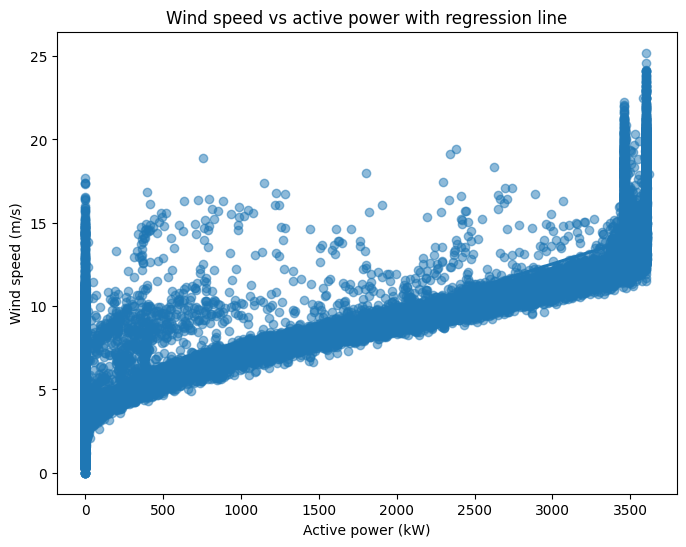

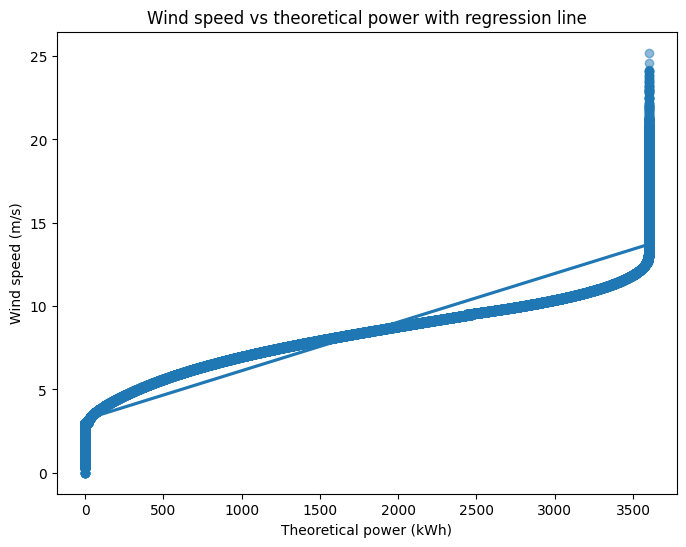

In [ ]:
import pandas as pd

# read CSV and strip spaces after delimiters so column names are clean
df = pd.read_csv("Yalova_Turkey_cleared.csv", skipinitialspace=True)
df.columns = df.columns.str.strip()

#check of column names
print('Columns:', df.columns.tolist())

#Histogram of Wind_speed 
import matplotlib.pyplot as plt
plt.hist(df['Wind_speed'], bins=50)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of wind speed')
plt.show()

#histogram of  Active_Power
plt.hist(df['Active_Power'], bins=50)
plt.xlabel('Active power (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of active power')
plt.show()

#historgram of Theoretical_Power
plt.hist(df['Theoretical_Power'], bins=50)
plt.xlabel('Theoretical power (kWh)')
plt.ylabel('Frequency')
plt.title('Histogram of theoretical power')
plt.show()

#correlation heatmap between Wind_speed, Active_Power and Theoretical_Power
import seaborn as sns
correlation_matrix = df[['Wind_speed', 'Active_Power', 'Theoretical_Power']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap between wind speed, active power and theoretical power')
plt.show()

#graph xaxis is Active_Power and yaxis is Wind_speed
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x='Active_Power', y='Wind_speed', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Active power (kW)')
plt.ylabel('Wind speed (m/s)')
plt.title('Wind speed vs active power with regression line')
plt.show()

#graph xaxis is Theoretical_Power and yaxis is Wind_speed
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x='Theoretical_Power', y='Wind_speed', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Theoretical power (kWh)')
plt.ylabel('Wind speed (m/s)')
plt.title('Wind speed vs theoretical power with regression line')
plt.show()


Massachusett clean solar

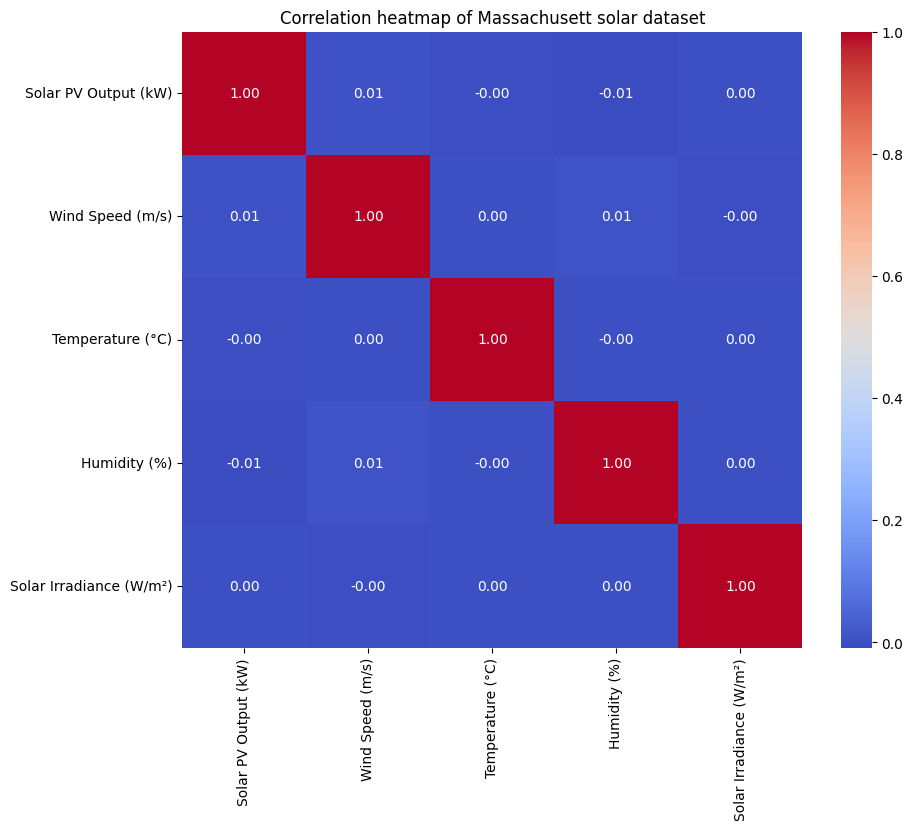

In [ ]:
import pandas as pd

#read csv file "Massachusett_solar"
df = pd.read_csv("Massachusett_solar.csv")

#delete columns:  'Day of Week', 'Is Weekend', 'Is Holiday','Season', 'Week of Year','Historical Electricity Load (kW)','Peak Load Indicator', 'Load Sector Type', 'Transformer Load Level','Voltage Level (V)', 'Current Level (A)', 'Power Factor','Substation ID / Region ID', 'Demand Response Signal (Binary)','Grid Frequency (Hz)', 'Wind Power Output (kW)','Solar Panel Temperature (°C)', 'Wind Direction (degrees)', 'Inverter Efficiency (%)','Battery State of Charge (SOC) (%)', 'Battery Discharge Rate (kW/h)','Renewable Forecast Error', 'Curtailment Event Flag','Cloud Cover (%)', 'Rainfall (mm)', 'Snowfall (mm)', 'Visibility (km)','Weather Condition', 'Atmospheric Pressure (hPa)', 'Dew Point (°C)','Smart Meter Reading per Building (kW)', 'Building Type (Encoded)','Building Occupancy Rate (%)', 'Public Transit Operational Load (kW)','EV Charging Station Load (kW)', 'EV Charging Session Count','Traffic Congestion Index', 'Human Mobility Score', 'Region Urban Density Index', 'Construction or Maintenance Activity Flag', 'Time Since Last Peak (hours)','Time Until Next Predicted Peak (hours)', 'Region/Zone ID', 'Latitude','Longitude', 'Altitude (m)', 'Distance to Nearest Substation (km)', 'Area Type', 'Electricity Load', 'Renewable Energy Load', 'Net Load','Curtailment Risk / Surplus Flag'
df = df.drop(columns=[
    'Day of Week', 'Is Weekend', 'Is Holiday','Season', 'Week of Year','Historical Electricity Load (kW)','Peak Load Indicator', 'Load Sector Type', 'Transformer Load Level','Voltage Level (V)', 'Current Level (A)', 'Power Factor','Substation ID / Region ID', 'Demand Response Signal (Binary)','Grid Frequency (Hz)', 'Wind Power Output (kW)','Solar Panel Temperature (°C)', 'Wind Direction (degrees)', 'Inverter Efficiency (%)','Battery State of Charge (SOC) (%)', 'Battery Discharge Rate (kW/h)','Renewable Forecast Error', 'Curtailment Event Flag','Cloud Cover (%)', 'Rainfall (mm)', 'Snowfall (mm)', 'Visibility (km)','Weather Condition', 'Atmospheric Pressure (hPa)', 'Dew Point (°C)','Smart Meter Reading per Building (kW)', 'Building Type (Encoded)','Building Occupancy Rate (%)', 'Public Transit Operational Load (kW)','EV Charging Station Load (kW)', 'EV Charging Session Count','Traffic Congestion Index', 'Human Mobility Score', 'Region Urban Density Index', 'Construction or Maintenance Activity Flag', 'Time Since Last Peak (hours)','Time Until Next Predicted Peak (hours)', 'Region/Zone ID', 'Latitude','Longitude', 'Altitude (m)', 'Distance to Nearest Substation (km)', 'Area Type', 'Electricity Load', 'Renewable Energy Load', 'Net Load','Curtailment Risk / Surplus Flag'
], errors='ignore')     

#delete column 'Month', 'HOur of Day'
df = df.drop(columns=['Month', 'Hour of Day'], errors='ignore')

#delete nan values from the dataframe
df = df.dropna()

#save the file as "Massachusett_solar_cleared_separated.csv"
df.to_csv("Massachusett_solar_cleared.csv", index=False)



Massachusett analysis

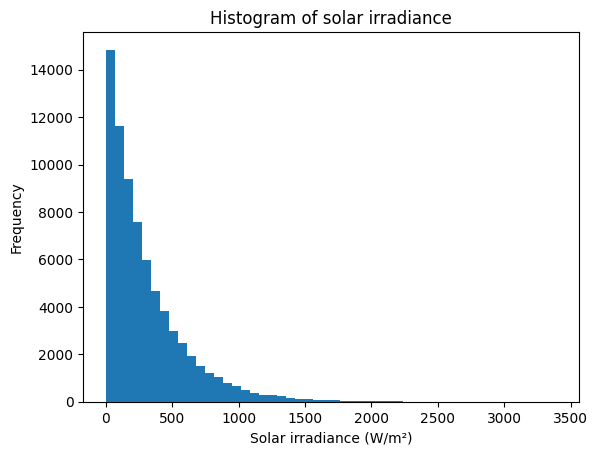

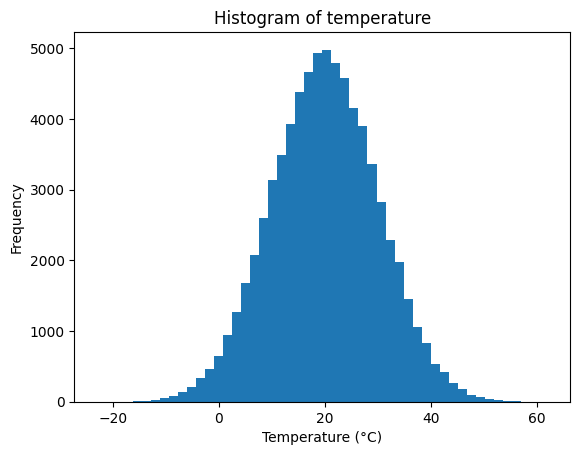

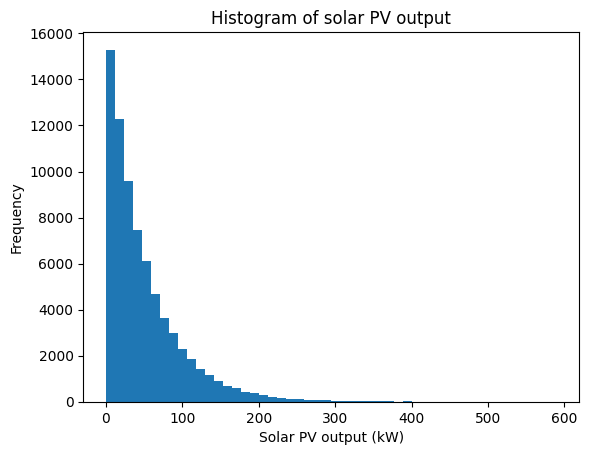

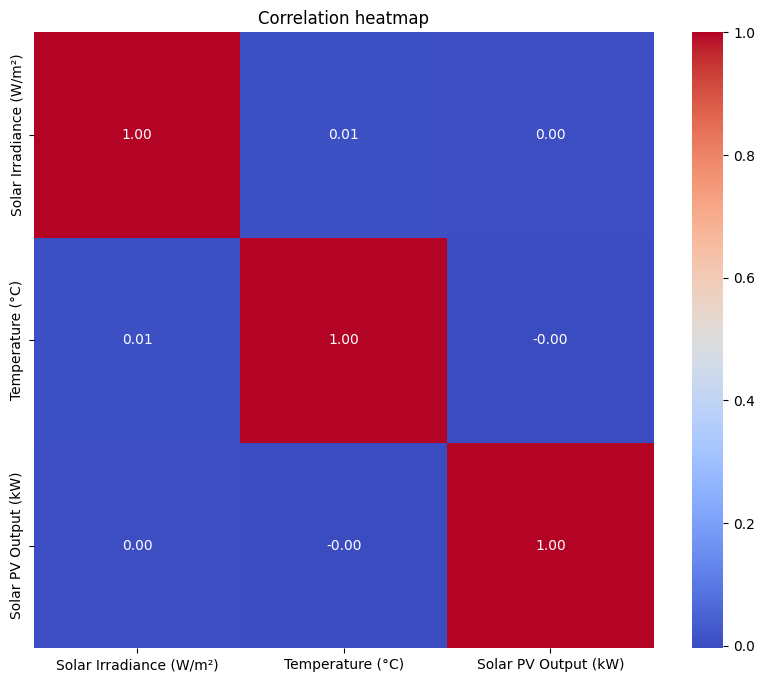

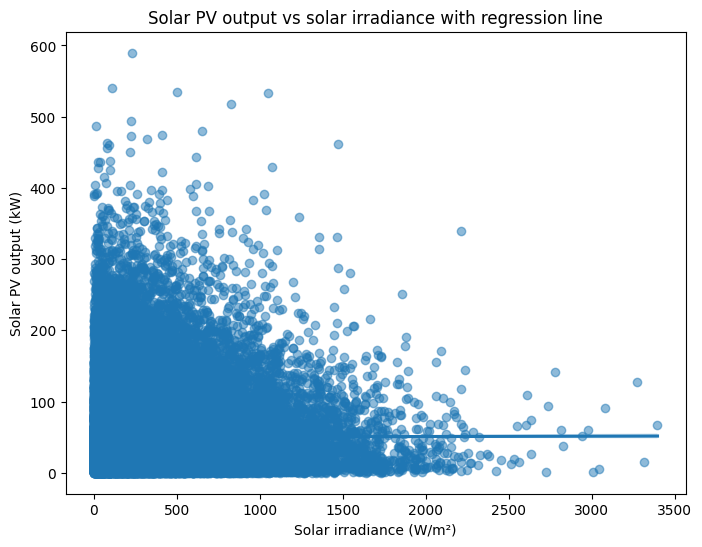

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV and normalize column names to remove leading/trailing spaces
df = pd.read_csv("Massachusett_solar_cleared.csv")
df.columns = df.columns.str.strip()

# histogram of Solar Irradiance (W/m2)
plt.hist(df['Solar Irradiance (W/m²)'], bins=50)
plt.xlabel('Solar irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of solar irradiance')
plt.show()

# histogram of Temperature (°C)
plt.hist(df['Temperature (°C)'], bins=50)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of temperature')
plt.show()

# histogram of Solar PV Output (kW)
plt.hist(df['Solar PV Output (kW)'], bins=50)
plt.xlabel('Solar PV output (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of solar PV output')
plt.show()

#correlative heatmap with all the dataset columns without timestamp column
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.drop(columns=['Timestamp'], errors='ignore').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap of Massachusett solar dataset')
plt.show()

# Solar Irradiance vs Solar PV Output
plt.figure(figsize=(8,6))
sns.regplot(x='Solar Irradiance (W/m²)', y='Solar PV Output (kW)', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Solar irradiance (W/m²)')
plt.ylabel('Solar PV output (kW)')
plt.title('Solar PV output vs solar irradiance with regression line')
plt.show()


USA my division 

In [18]:
#read csv file "Massachusett_solar_cleared.csv"
import pandas as pd
df = pd.read_csv("Massachusett_solar_cleared.csv")
print(df.columns)
print(df.info())
print(df.describe())
print(df.head())

#drop values above 1500 in  'Solar Irradiance (W/m²) 
df = df[df['Solar Irradiance (W/m²)'] <= 1500]
   

#divide the data into 2 csv file, one where IRR is greater than 150 and one where IRR is less than or equal to 150
df_high_irr = df[df['Solar Irradiance (W/m²)'] > 150]
df_low_irr = df[df['Solar Irradiance (W/m²)'] <= 150]
df_high_irr.to_csv("USA_high_IRR.csv", index=False)
df_low_irr.to_csv("USA_low_irr.csv", index=False)


Index(['Timestamp', 'Solar PV Output (kW)', 'Wind Speed (m/s)',
       'Temperature (°C)', 'Humidity (%)', 'Solar Irradiance (W/m²)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72960 entries, 0 to 72959
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                72960 non-null  object 
 1   Solar PV Output (kW)     72960 non-null  float64
 2   Wind Speed (m/s)         72960 non-null  float64
 3   Temperature (°C)         72960 non-null  float64
 4   Humidity (%)             72960 non-null  float64
 5   Solar Irradiance (W/m²)  72960 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.3+ MB
None
       Solar PV Output (kW)  Wind Speed (m/s)  Temperature (°C)  Humidity (%)  \
count          72960.000000      72960.000000      72960.000000  72960.000000   
mean              49.968334          5.001693         20.004404     28.553542   
std

USA- high IRR analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read csv file "USA_high_IRR.csv"
df = pd.read_csv("massachusett_solar_high_IRR.csv")

#histogram of Solar PV Output (kW)
plt.hist(df['Solar PV Output (kW)'], bins=50)
plt.xlabel('Solar PV output (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of solar PV output (High IRR)')
plt.show()

#histogram of Temperature (°C)
plt.hist(df['Temperature (°C)'], bins=50)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of temperature (High IRR)')
plt.show()

#histogram of Solar Irradiance (W/m2)
plt.hist(df['Solar Irradiance (W/m²)'], bins=50)
plt.xlabel('Solar irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of solar irradiance (High IRR)')
plt.show()

# Prepare numeric columns (drop Timestamp, coerce to float, round for nicer display only)
numeric_df = df.drop(columns=['Timestamp'], errors='ignore').apply(pd.to_numeric, errors='coerce')
rounded_numeric_df = numeric_df.round(3)

# correlation heatmap
correlation_matrix = rounded_numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation heatmap of USA high IRR solar dataset')
plt.show()

#graph yaxis is Solar PV Output (kW) and xaxis is Temperature (°C)
plt.figure(figsize=(8,6))
sns.regplot(x='Temperature (°C)', y='Solar PV Output (kW)', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Temperature (°C)')
plt.ylabel('Solar PV output (kW)')
plt.title('Solar PV output vs temperature with regression line (High IRR)')
plt.show()

#graph yaxis is Solar PV Output (kW) and xaxis is Solar Irradiance (W/m2)
plt.figure(figsize=(8,6))
sns.regplot(x='Solar Irradiance (W/m²)', y='Solar PV Output (kW)', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Solar irradiance (W/m²)')
plt.ylabel('Solar PV output (kW)')
plt.title('Solar PV output vs solar irradiance with regression line (High IRR)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'massachusett_solar_high_IRR.csv'

USA solar analysis low irr

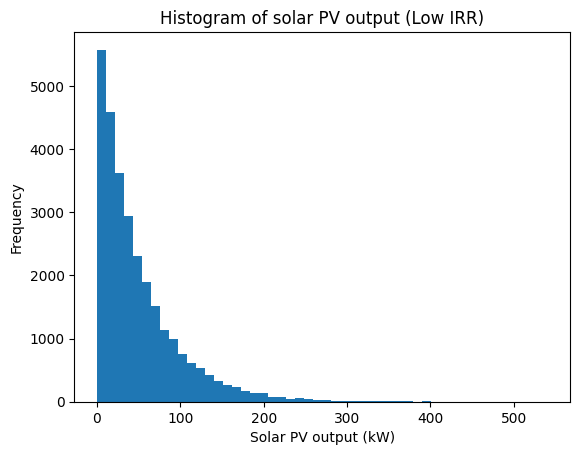

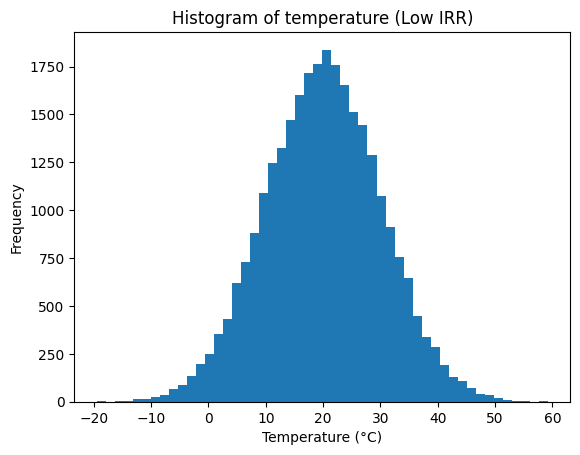

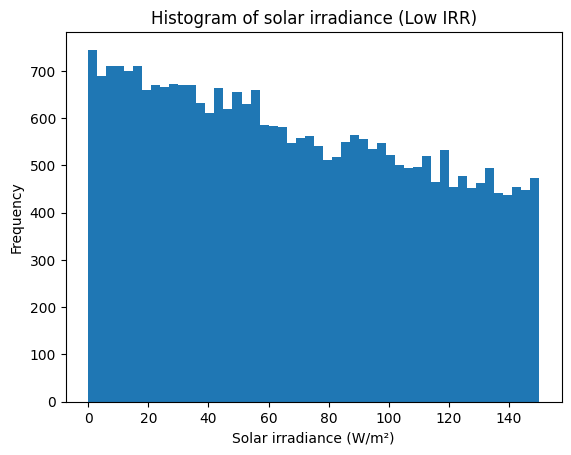

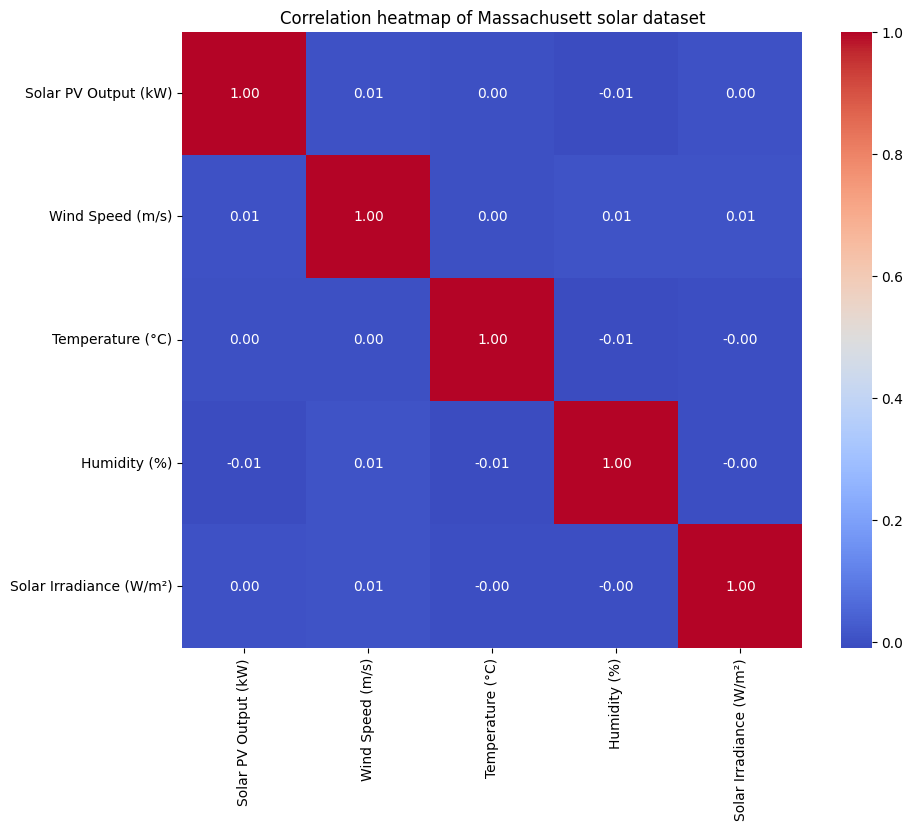

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#read csv file "USA_low_irr.csv"
df = pd.read_csv("USA_low_irr.csv")

#histogram of Solar PV Output (kW)
plt.hist(df['Solar PV Output (kW)'], bins=50)
plt.xlabel('Solar PV output (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of solar PV output (Low IRR)')
plt.show()

#histogram of Temperature (°C)
plt.hist(df['Temperature (°C)'], bins=50)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of temperature (Low IRR)')
plt.show()

#histogram of Solar Irradiance (W/m2)
plt.hist(df['Solar Irradiance (W/m²)'], bins=50)
plt.xlabel('Solar irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of solar irradiance (Low IRR)')
plt.show()

#correlation heatmap with all the data
import seaborn as sns
correlation_matrix = df.drop(columns=['Timestamp'], errors='ignore').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap of Massachusett solar dataset')
plt.show()
